In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import pandas as pd

# Load Fashion MNIST
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

# Reshape and Normalize
trainX = trainX.reshape(-1, 28, 28, 1) / 255.0
testX = testX.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode
trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

# Class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import pandas as pd

# Load CSVs
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

# Extract labels and image pixels
trainX = train_df.drop('label', axis=1).values
trainY = train_df['label'].values

testX = test_df.drop('label', axis=1).values
testY = test_df['label'].values

# Reshape and normalize
trainX = trainX.reshape(-1, 28, 28, 1) / 255.0
testX = testX.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
trainY_cat = to_categorical(trainY)
testY_cat = to_categorical(testY)

# Class names (optional)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


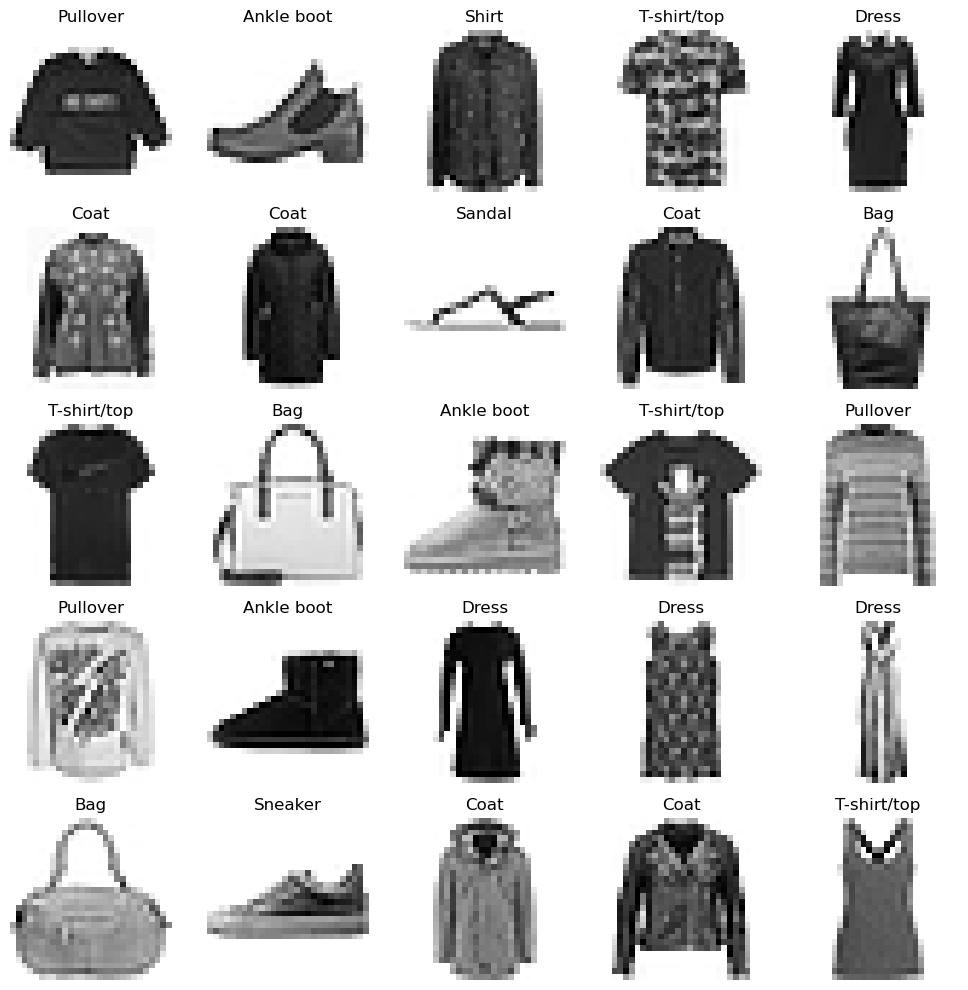

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(trainX[i].squeeze(), cmap='binary')
    plt.title(classes[trainY[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(trainX, trainY_cat, epochs=10, validation_data=(testX, testY_cat))





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 average_pooling2d (Average  (None, 14, 14, 64)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 128)       512       
 chNormalization)                                                
                                                     

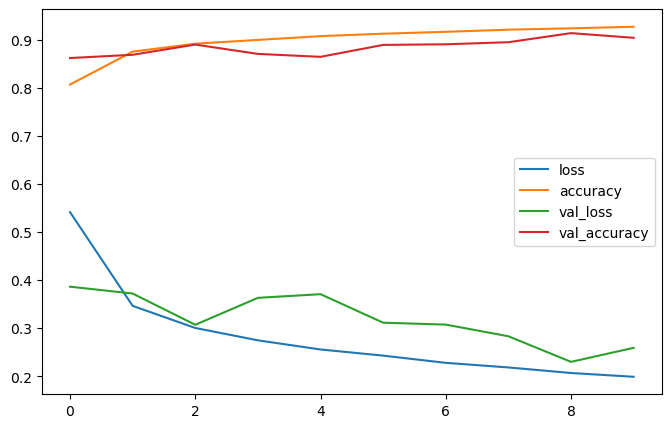

313/313 [==============================] - 2s 6ms/step - loss: 0.2592 - accuracy: 0.9039
Test Accuracy: 0.90
313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9039
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.80      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.93      0.77      0.84      1000
       Dress       0.81      0.97      0.88      1000
        Coat       0.87      0.83      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.70      0.79      0.74      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



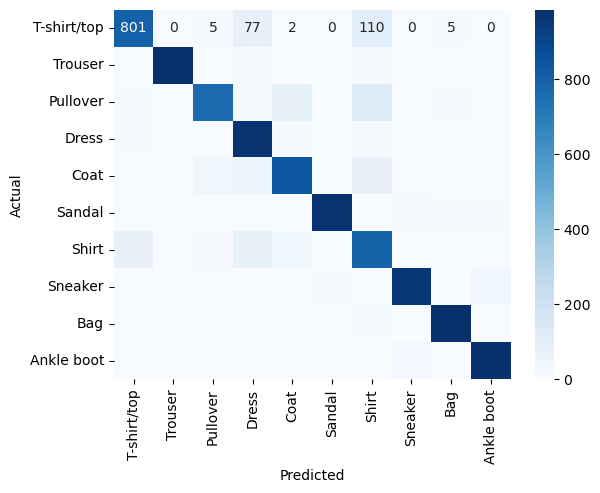

In [7]:
# Plot loss/accuracy
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Evaluate
test_loss, test_acc = model.evaluate(testX, testY_cat)
print(f"Test Accuracy: {test_acc:.2f}")

# Predict
pred = np.argmax(model.predict(testX), axis=1)

# Metrics
print("Accuracy:", accuracy_score(testY, pred))
print(classification_report(testY, pred, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(testY, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


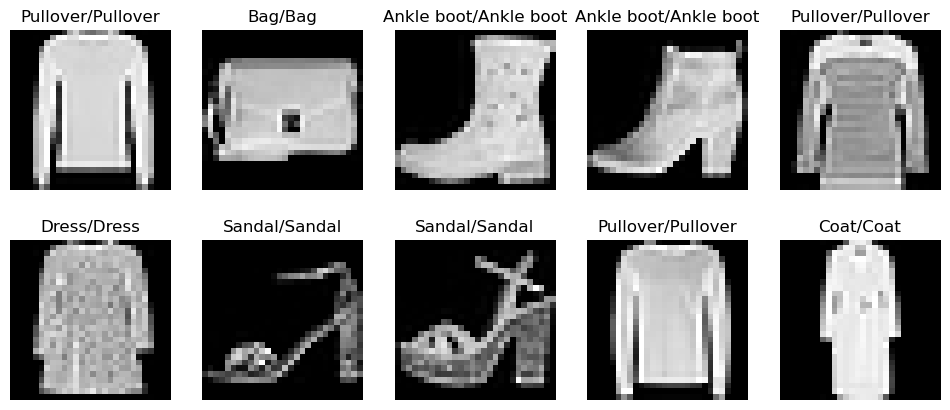

In [22]:
idxs = np.random.choice(len(testX), 10, replace=False)
plt.figure(figsize=(12, 5))

for i, idx in enumerate(idxs):
    img = testX[idx]
    pred = classes[np.argmax(model.predict(img[None], verbose=0))]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"{classes[testY[idx]]}/{pred}")
    plt.axis('off')

plt.show()

In [ ]:
indx=np.random.choice(len(testx),10,replace=False)
plot

for i,idx in enumerate (indx):
    img=idx(testx)
    pred=classes(np.argmax[model.predict(img[None],verbose[0])